In [1]:
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import boston_housing
from keras import (
    models, layers, regularizers, optimizers
)

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 3us/step


In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [8]:
from tensorflow.keras.layers import Normalization

In [27]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean 
train_data /= std

test_data -= mean
test_data /= std

In [28]:
def build(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data)))
    model.add(layers.Dense(64, activation='relu', ))
    model.add(layers.Dense(1))
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mae', 'mape'])
    return model

In [58]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 500
all_history = []

In [47]:
import sys

In [59]:
for i in range(k):
    print('Fold: {}'.format(i))
    val_data = train_data[i*num_val_samples : (i+1) * num_val_samples]
    val_target = train_labels[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i+1)*num_val_samples:]],
        axis=0
    )
    partial_target_data = np.concatenate(
        [train_labels[:i * num_val_samples], train_labels[(i+1)*num_val_samples:]],
        axis=0
    )
    model = build(0.001,(13,))
    history = model.fit(partial_train_data, partial_target_data,
                        epochs= num_epoch,
                        batch_size = 16,
                        validation_data=(val_data, val_target),
                        verbose=0
    )
    # print(pd.DataFrame(history.history).apply(np.mean))
    all_history.append(history.history)

Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [61]:
pd.DataFrame(all_history).applymap(np.mean)

,loss,mae,mape,val_loss,val_mae,val_mape
0,7.128660,1.440010,7.082534,11.909209,2.219049,12.813920
1,6.361312,1.337122,6.671543,17.291090,2.790302,16.364497
2,5.998555,1.238866,6.071365,16.007120,2.638976,13.786133
3,7.141792,1.372085,7.045649,16.604478,2.658613,12.376574


In [115]:
import matplotlib.pyplot as plt
%matplotlib widget

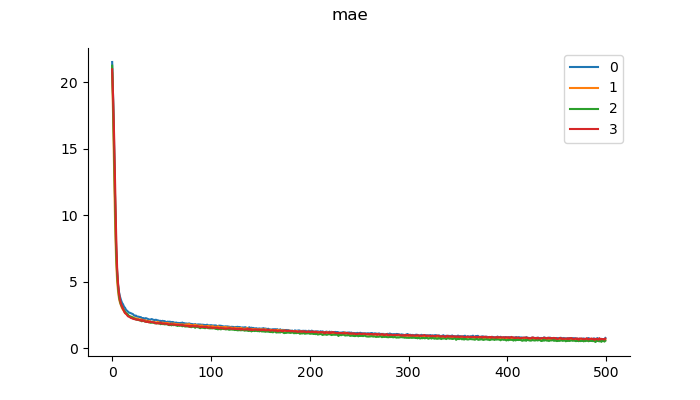

In [121]:
fig = plt.figure(figsize=(7,4))
fig.suptitle('mae')
ax = fig.add_subplot(111)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
# ax.spines = ['left', 'bottom']
hist = pd.DataFrame(all_history).applymap(np.array)
for idx, data in enumerate(hist['mae']):
    ax.plot(data, label=str(idx))
ax.legend()
# ax.set_ylim(0,2)
plt.show()

In [111]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 17.3929 - mae: 2.8060 - mape: 13.5557


[17.392852783203125, 2.8060340881347656, 13.555702209472656]